In [4]:
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from constants import *
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import optimizers

In [5]:
# for every specie inthe SPECIES list, get the images in the test folder
SPECIES = [
    "amborella",
    "castanea",
    "convolvulaceae",
    "desmodium",
    "eugenia",
    "laurus",
    "litsea",
    "magnolia",
    "monimiaceae",
    "rubus",
    "ulmus",
]
test_images = []
train_images = []
for specie in SPECIES:
    test_images += [os.path.join("dataset/Test/", specie, image) for image in os.listdir(os.path.join("dataset/Test/", specie))]
    train_images += [os.path.join("dataset/Train/", specie, image) for image in os.listdir(os.path.join("dataset/Train/", specie))]

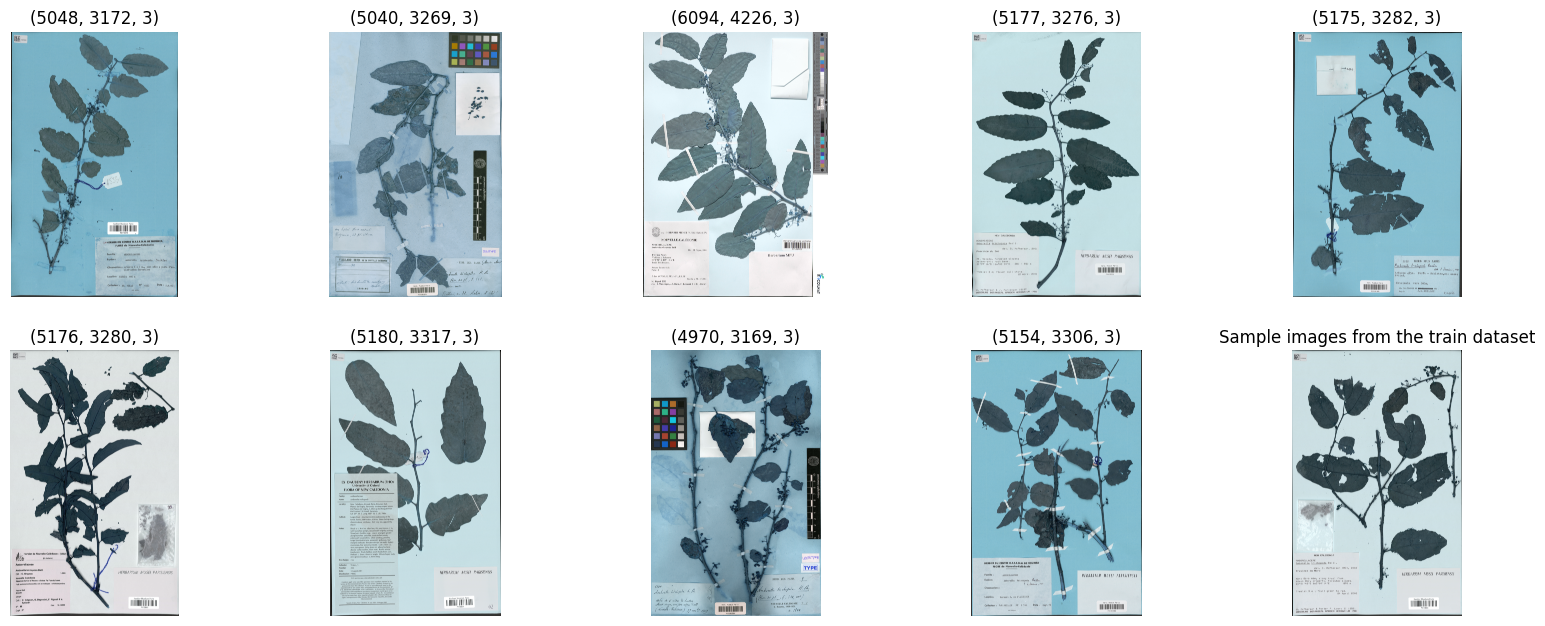

In [6]:
# display first 10 images in the train_images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.imread(train_images[i]))
    plt.axis("off")
    # shape of the image
    plt.title(cv2.imread(train_images[i]).shape)
plt.title("Sample images from the train dataset")
plt.show()

In [7]:
# resize the images to 500x500 with the PIL thumbnail method
for image in train_images:
    img = Image.open(image)
    img.thumbnail((500, 500))
    image = image.replace("Train", "Train Resized")
    img.save(image)


In [9]:
train_images = []
for specie in SPECIES:
    train_images += [os.path.join("dataset/Train Resized/", specie, image) for image in os.listdir(os.path.join("dataset/Train Resized/", specie))]

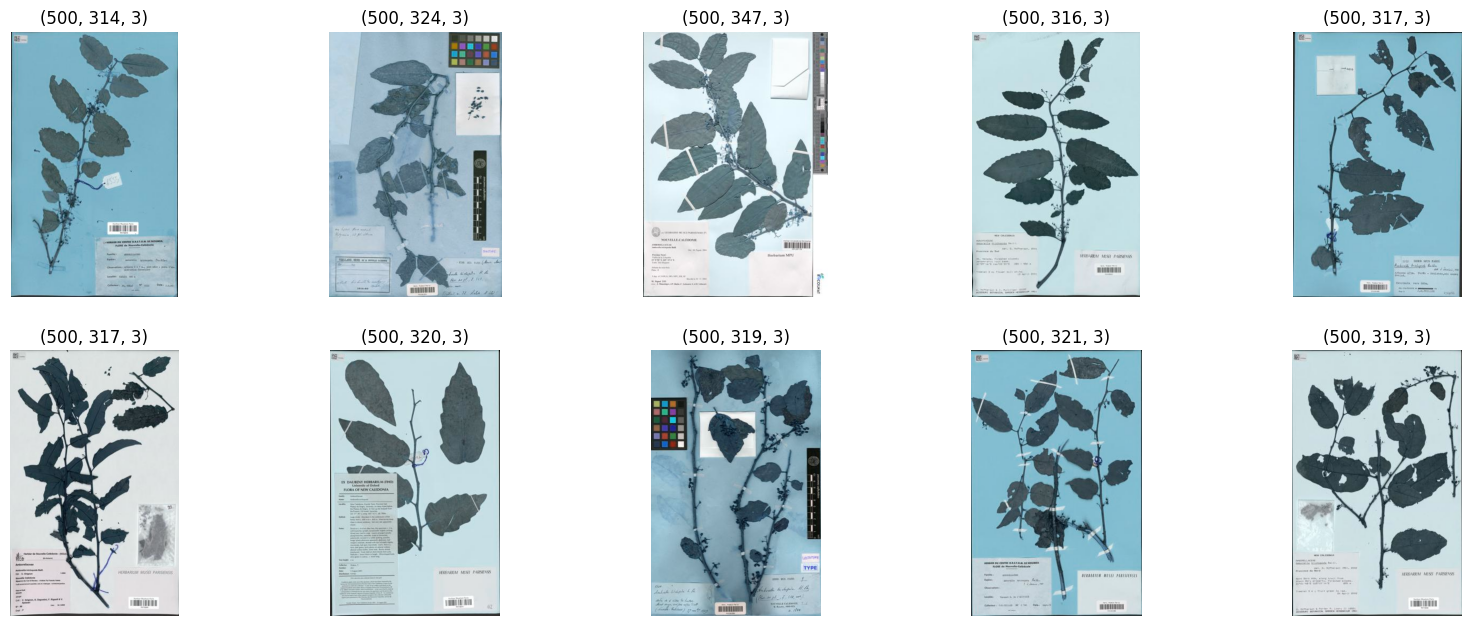

In [10]:
# display first 10 images in the train_images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.imread(train_images[i]))
    plt.axis("off")
    # shape of the image
    plt.title(cv2.imread(train_images[i]).shape)
plt.show()

In [11]:
# get max width and height of the images
max_width = 0
max_height = 0
for image in train_images:
    img = cv2.imread(image)
    if img.shape[0] > max_height:
        max_height = img.shape[0]
    if img.shape[1] > max_width:
        max_width = img.shape[1]
        

In [12]:
max_height, max_width

(500, 391)

In [13]:
# add padding to the images to make them the same size
def add_padding(image):
    # get the shape of the image
    height, width, _ = image.shape
    # calculate the difference in height and width
    height_diff = max_height - height
    width_diff = 500 - width
    # add padding to the image
    image = cv2.copyMakeBorder(
        image,
        top=height_diff // 2,
        bottom=height_diff - height_diff // 2,
        left=width_diff // 2,
        right=width_diff - width_diff // 2,
        borderType=cv2.BORDER_REPLICATE,
        value=[0, 0, 0],
    )
    return image

In [14]:
train_images_padded = [add_padding(cv2.imread(image)) for image in train_images]

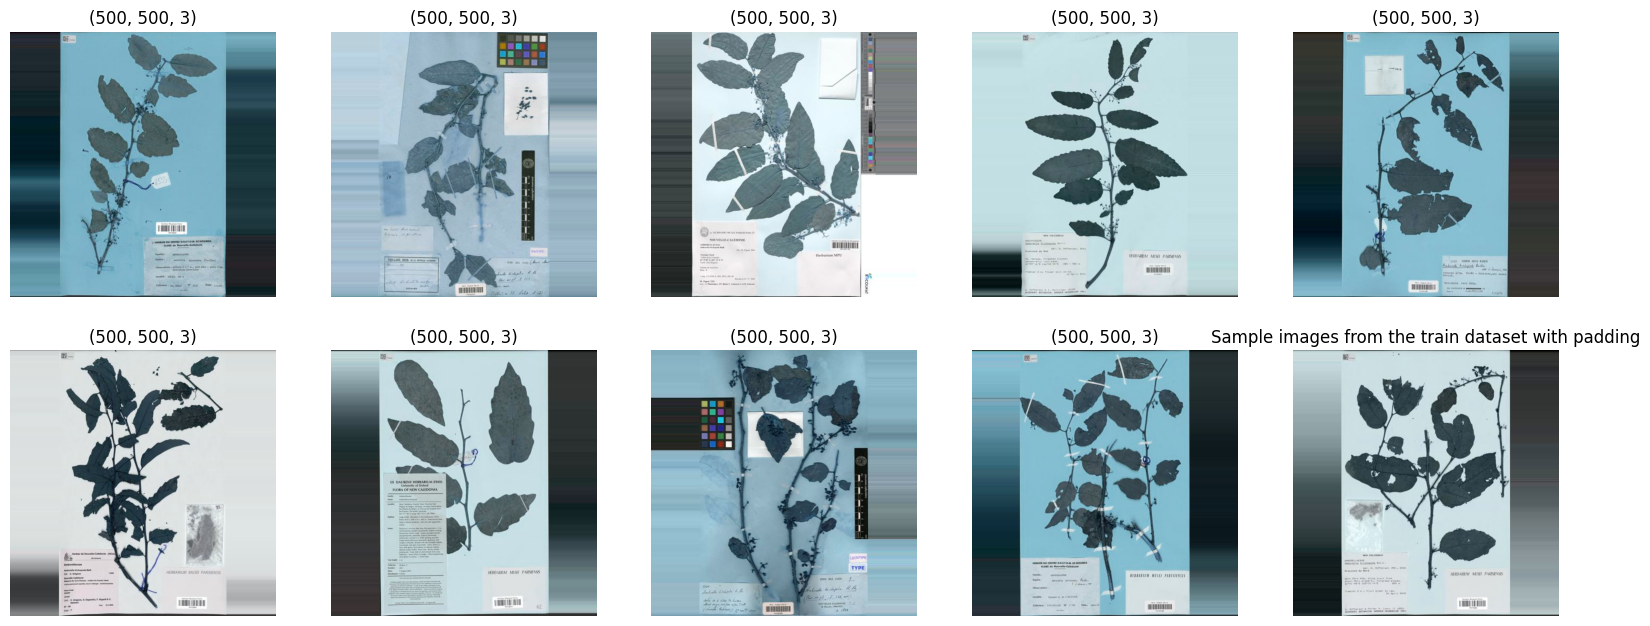

In [15]:
# display first 10 images in the train_images_padded
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images_padded[i])
    plt.axis("off")
    # shape of the image
    plt.title(train_images_padded[i].shape)
plt.title("Sample images from the train dataset with padding")
plt.show()

In [16]:
# save the padded images
for i in range(len(train_images)):
    filename = train_images[i].replace("Train Resized", "Train Padded")
    cv2.imwrite(filename, train_images_padded[i])

In [18]:
# create a dataframe with the padded images and their labels
train_images_padded = []
for specie in SPECIES:
    train_images_padded += [os.path.join("dataset/Train Padded/", specie, image) for image in os.listdir(os.path.join("dataset/Train Padded/", specie))]
train_df = pd.DataFrame({"image": train_images_padded, "label": [image.split("/")[2] for image in train_images_padded]})

In [19]:
# shuffle the dataframe
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [22]:
# save the dataframe
train_df.to_csv("dataframes/train.csv", index=False)

In [24]:
# repeat the same process for the test images
test_images = []
for specie in SPECIES:
    test_images += [os.path.join("dataset/Test/", specie, image) for image in os.listdir(os.path.join("dataset/Test/", specie))]

# resize the images to 500x500 with the PIL thumbnail method
for image in test_images:
    img = Image.open(image)
    img.thumbnail((500, 500))
    image = image.replace("Test", "Test Resized")
    img.save(image)

test_images = []
for specie in SPECIES:
    test_images += [os.path.join("dataset/Test Resized/", specie, image) for image in os.listdir(os.path.join("dataset/Test Resized/", specie))]

# get max width and height of the images
max_width = 0
max_height = 0
for image in test_images:
    img = cv2.imread(image)
    if img.shape[0] > max_height:
        max_height = img.shape[0]
    if img.shape[1] > max_width:
        max_width = img.shape[1]

# add padding to the images to make them the same size
test_images_padded = [add_padding(cv2.imread(image)) for image in test_images]

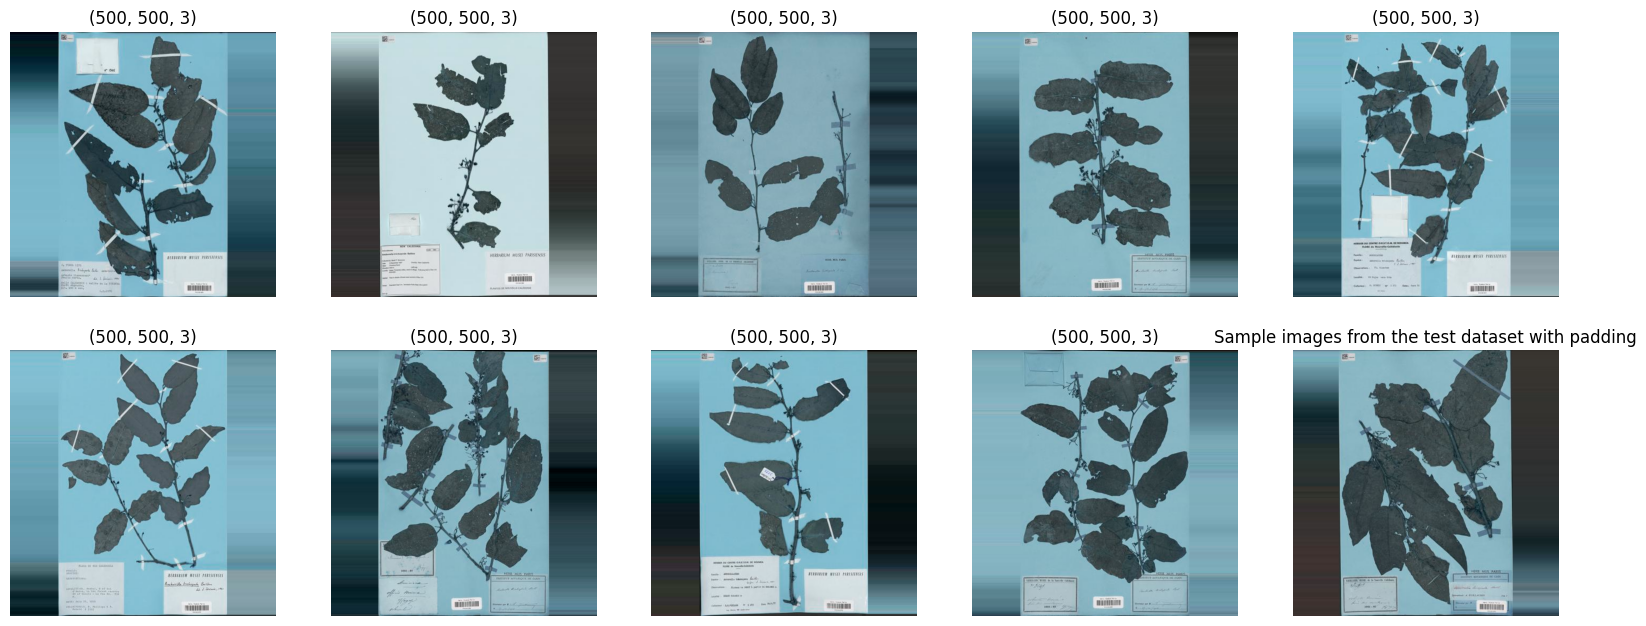

In [25]:
# display first 10 images in the test_images_padded
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_padded[i])
    plt.axis("off")
    # shape of the image
    plt.title(test_images_padded[i].shape)
plt.title("Sample images from the test dataset with padding")
plt.show()

In [26]:
# save the padded images
for i in range(len(test_images)):
    filename = test_images[i].replace("Test Resized", "Test Padded")
    cv2.imwrite(filename, test_images_padded[i])

In [28]:
# create a dataframe with the padded images and their labels
test_images_padded = []
for specie in SPECIES:
    test_images_padded += [os.path.join("dataset/Test Padded/", specie, image) for image in os.listdir(os.path.join("dataset/Test Padded/", specie))]
test_df = pd.DataFrame({"image": test_images_padded, "label": [image.split("/")[2] for image in test_images_padded]})
# shuffle the dataframe
test_df = test_df.sample(frac=1).reset_index(drop=True)
# save the dataframe
test_df.to_csv("dataframes/test.csv", index=False)

In [29]:
# object recognition model with the labels from SPECIES
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),  
    tf.keras.layers.Dense(len(SPECIES), activation="softmax"),
])


2022-12-05 16:25:31.182769: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-05 16:25:31.183023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 16:25:31.183113: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 16:25:31.183191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.

In [30]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [31]:
# create a data generator for the train dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [32]:
# create a data generator for the test dataset
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

In [33]:
# create a data generator for the train dataset
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image",
    y_col="label",
    target_size=(500, 500),
    batch_size=32,
    class_mode="sparse",
)

# create a data generator for the test dataset
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image",
    y_col="label",
    target_size=(500, 500),
    batch_size=32,
    class_mode="sparse",
)

Found 220 validated image filenames belonging to 11 classes.
Found 110 validated image filenames belonging to 11 classes.


In [34]:
# train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
)

Epoch 1/100


2022-12-05 16:25:44.095787: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.
2022-12-05 16:25:49.784416: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


1/7 [===>..........................] - ETA: 57s - loss: 2.3831 - accuracy: 0.1562

2022-12-05 16:25:51.162398: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.
2022-12-05 16:25:56.561647: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


2/7 [=======>......................] - ETA: 33s - loss: 10.1469 - accuracy: 0.1406

2022-12-05 16:25:57.791817: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1015824384 exceeds 10% of free system memory.


7/7 [==============================] - 56s 8s/step - loss: 5.1111 - accuracy: 0.1227 - val_loss: 2.4054 - val_accuracy: 0.0909
Epoch 2/100
7/7 [==============================] - 52s 7s/step - loss: 2.4030 - accuracy: 0.0818 - val_loss: 2.3959 - val_accuracy: 0.0909
Epoch 3/100
7/7 [==============================] - 53s 7s/step - loss: 2.4107 - accuracy: 0.1091 - val_loss: 2.3966 - val_accuracy: 0.0909
Epoch 4/100
7/7 [==============================] - 56s 7s/step - loss: 2.3970 - accuracy: 0.0773 - val_loss: 2.3998 - val_accuracy: 0.1000
Epoch 5/100
7/7 [==============================] - 53s 7s/step - loss: 2.4035 - accuracy: 0.1182 - val_loss: 2.4026 - val_accuracy: 0.0818
Epoch 6/100
7/7 [==============================] - 51s 7s/step - loss: 2.3939 - accuracy: 0.0773 - val_loss: 2.3973 - val_accuracy: 0.0909
Epoch 7/100
7/7 [==============================] - 51s 7s/step - loss: 2.3677 - accuracy: 0.1182 - val_loss: 2.3997 - val_accuracy: 0.1455
Epoch 8/100
7/7 [======================

In [ ]:
print(next(train_generator))